# Procesamiento de datos de Agricultores de la Amazonía ecuatoriana

Por: Daning Montaño Ocampo

Fecha: 22/06/2025

## 1.Librerías

In [ ]:
library(dplyr) ## manejo de datos
library(ggplot2)  ## Generacion de gráficas
library(readxl) ## abrir archivos de excel
library(lubridate) ## manejo de fechas
library(psych) ## cor plot
library(factoextra) ## generación de PCA
library("FactoMineR")

## 2. Carga de datos

In [ ]:
df_agri = read_excel("Data/Informacion_agricultores.xlsx")%>%as.data.frame()
df_agri

         sexo nacionalidad fecha_nacimiento       estado_civil jefe_familia   provincia discapacidad        educacion ingreso_mensual bono bono_cuanto
1      hombre       kichwa       1979-08-21             Casado           Si pro_pastaza           no   edu_secundaria             200   No        <NA>
2       mujer       kichwa       1970-06-20           Separado           Si     pastaza           No         primaria              10   Si          55
3   sex_mujer   nac_kichwa       2003-04-26     estciv_soltero           no pro_pastaza           no   edu_secundaria              10   si           0
4   sex_mujer   nac_kichwa       1977-10-19      estciv_casado           si pro_pastaza           no     edu_primaria             200   si          74
5   sex_mujer   nac_kichwa       1983-05-30     estciv_soltero           si pro_pastaza           no   edu_secundaria             250   si          79
6   sex_mujer   nac_kichwa       1982-09-01      estciv_casado           no pro_pastaza       

In [ ]:
str(df_agri)

'data.frame':	580 obs. of  21 variables:
 $ sexo                           : chr  "hombre" "mujer" "sex_mujer" "sex_mujer" ...
 $ nacionalidad                   : chr  "kichwa" "kichwa" "nac_kichwa" "nac_kichwa" ...
 $ fecha_nacimiento               : chr  "1979-08-21" "1970-06-20" "2003-04-26" "1977-10-19" ...
 $ estado_civil                   : chr  "Casado" "Separado" "estciv_soltero" "estciv_casado" ...
 $ jefe_familia                   : chr  "Si" "Si" "no" "si" ...
 $ provincia                      : chr  "pro_pastaza" "pastaza" "pro_pastaza" "pro_pastaza" ...
 $ discapacidad                   : chr  "no" "No" "no" "no" ...
 $ educacion                      : chr  "edu_secundaria" "primaria" "edu_secundaria" "edu_primaria" ...
 $ ingreso_mensual                : chr  "200" "10" "10" "200" ...
 $ bono                           : chr  "No" "Si" "si" "si" ...
 $ bono_cuanto                    : chr  NA "55" "0" "74" ...
 $ numero_mujeres                 : chr  NA "3" NA "3" ...
 $ n

## 3. Limpieza de datos

In [ ]:
df_agri = df_agri %>%
  ## Cambiar categorías de Sexo
  mutate(sexo = case_when( 
    sexo == "sex_mujer" ~ "Mujer",
    sexo == "sex_hombre" ~ "Hombre",
    sexo == "hombre" ~ "Hombre",
    sexo == "mujer" ~ "Mujer",
    TRUE ~ sexo  
  ))  %>%
  
  ## Cambiar categoría de Nacionalidad
  mutate(nacionalidad = case_when( 
    nacionalidad == "kichwa" ~ "Kichwa",
    nacionalidad == "nac_kichwa" ~ "Kichwa",
    nacionalidad == "nac_woarani" ~ "Woarani",
    nacionalidad == "nac_shuar" ~ "Shuar",
    nacionalidad == "nac_mestizo" ~ "Mestizo",
    nacionalidad == "nac_sapara" ~ "Sapara",
    nacionalidad == "nac_otra" ~ "Otra",
    TRUE ~ nacionalidad  
  )) %>%
  
  ## Crear variable Edad
  mutate(edad = as.integer(floor(interval(fecha_nacimiento, today()) / years(1))))%>%
  
  ## Cambia categirías de estado civil 

  mutate(estado_civil = case_when( 
    estado_civil == "estciv_soltero" ~ "Soltero",
    estado_civil == "estciv_casado" ~ "Casado",
    estado_civil == "estciv_union_libre" ~ "Unión libre",
    estado_civil == "estciv_divorciado" ~ "Separado",
    estado_civil == "estciv_viudo" ~ "Viudo",
    estado_civil == "estciv_separado" ~ "Separado",
    estado_civil == "NA" ~ "Soltero",
    TRUE ~ estado_civil  
  )) %>%
  
  ## Cambia categorías Educacion
  mutate(educacion = case_when( 
    educacion == "edu_secundaria" ~ "Secundaria",
    educacion == "primaria" ~ "Primaria",
    educacion == "edu_primaria" ~ "Primaria",
    educacion == "edu_tercer_nivel" ~ "Tercer nivel",
    educacion == "edu_inicial" ~ "Educación inicial",
    educacion == "edu_cuarto_nivel" ~ "Cuarto nivel",
    educacion == "edu_analfabeto" ~ "Analfabeto",
    TRUE ~ educacion  
  ))%>%
  
  
  ## Cambia categorías Educacion
  mutate(bono = case_when( 
    bono == "si" ~ "Si",
    bono == "no" ~ "No",
    TRUE ~ bono  
  ))%>%
  

  ## Rellena de 0 las observaciones con NA en la variable Cuanto de Bono
  
  mutate(bono_cuanto = if_else(is.na(as.numeric(bono_cuanto)), 0, as.numeric(bono_cuanto)))%>%
  
  ## Total de horas de trabajo al mes

  mutate(total_horas_mensual = if_else(
    is.na(as.numeric(diastrabajo_sistemaagroforestal)) | is.na(as.numeric(horatrabajo_sistemaagroforestal)),
    0,
    as.numeric(diastrabajo_sistemaagroforestal) * as.numeric(horatrabajo_sistemaagroforestal)
  ))%>%
  
  ## Rellena de 0 las observaciones con NA en la variable financiamiento_deuda, que significa que se endeudaría por un crédito para producción
  
  mutate(financiamiento_deuda  = if_else(is.na(financiamiento_deuda ),"no", financiamiento_deuda ))%>%
  
  ## Rellena de 0 las observaciones con NA en la fin_monto, uw significa por cuanto se endeudaría
  
  mutate(fin_monto = if_else(is.na(as.numeric(fin_monto)), 0, as.numeric(fin_monto)))%>%
  
  mutate(ingreso_mensual = as.numeric(ingreso_mensual))%>%
  
  mutate(diastrabajo_sistemaagroforestal = as.numeric(diastrabajo_sistemaagroforestal))%>%
  
  mutate(horatrabajo_sistemaagroforestal = as.numeric(horatrabajo_sistemaagroforestal))%>%
  
  mutate(gasto_sistemaagroforestal = as.numeric(gasto_sistemaagroforestal))%>%
  mutate( financiamiento_deuda = as.factor( financiamiento_deuda))%>%
  mutate(sexo = as.factor(sexo))%>%
  mutate(financiamiento_deuda  = as.factor(financiamiento_deuda ))%>%
  mutate(bono  = as.factor(bono ))
  

  

df_agri

     sexo nacionalidad fecha_nacimiento estado_civil jefe_familia   provincia discapacidad         educacion ingreso_mensual bono bono_cuanto numero_mujeres
1  Hombre       Kichwa       1979-08-21       Casado           Si pro_pastaza           no        Secundaria             200   No           0           <NA>
2   Mujer       Kichwa       1970-06-20     Separado           Si     pastaza           No          Primaria              10   Si          55              3
3   Mujer       Kichwa       2003-04-26      Soltero           no pro_pastaza           no        Secundaria              10   Si           0           <NA>
4   Mujer       Kichwa       1977-10-19       Casado           si pro_pastaza           no          Primaria             200   Si          74              3
5   Mujer       Kichwa       1983-05-30      Soltero           si pro_pastaza           no        Secundaria             250   Si          79              2
6   Mujer       Kichwa       1982-09-01       Casado      

## 4. Análisis Exploratorio de datos (EDA)

Nuestra Variable de interés es saber las variables que inbfluencian en la intención de acceder a un crédito verde. financiamiento_deuda, tiene Si cuando el agricultor quiere acceder a un crédito, y No cuando no tiene la intención.

Para practicidad trabajaremos solo con datos completos y seleccionaremos solo ciertas variables, de las cuales se intuye que existe alguna relación con la variable objetivo

In [ ]:
df_agri = df_agri %>% select(sexo, ingreso_mensual,  bono_cuanto, 
  diastrabajo_sistemaagroforestal,horatrabajo_sistemaagroforestal, gasto_sistemaagroforestal,financiamiento_deuda,edad, fin_monto )

In [ ]:
df_agri = na.omit(df_agri)

### 4.1. Tamaño dataset

In [ ]:
dim(df_agri) ## filas y columnas

[1] 570   9

### 4.2. Tipo de variables

In [ ]:
str(df_agri)

'data.frame':	570 obs. of  9 variables:
 $ sexo                           : Factor w/ 2 levels "Hombre","Mujer": 1 2 2 2 2 1 2 1 2 2 ...
 $ ingreso_mensual                : num  200 10 200 250 100 70 60 500 40 50 ...
 $ bono_cuanto                    : num  0 0 74 79 50 0 50 0 0 80 ...
 $ diastrabajo_sistemaagroforestal: num  5 2 2 2 5 4 4 2 2 2 ...
 $ horatrabajo_sistemaagroforestal: num  4 4 8 8 4 8 5 3 5 3 ...
 $ gasto_sistemaagroforestal      : num  400 80 120 50 160 240 130 80 100 100 ...
 $ financiamiento_deuda           : Factor w/ 2 levels "no","si": 2 1 2 2 2 2 2 2 2 1 ...
 $ edad                           : int  45 22 47 42 42 54 51 37 33 25 ...
 $ fin_monto                      : num  300 0 2000 2000 1000 500 500 1000 1000 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:10] 2 32 64 93 168 169 256 311 464 571
  ..- attr(*, "names")= chr [1:10] "2" "32" "64" "93" ...


### 4.3. Descripción de variables

In [ ]:
summary(df_agri)

     sexo     ingreso_mensual   bono_cuanto     diastrabajo_sistemaagroforestal horatrabajo_sistemaagroforestal gasto_sistemaagroforestal financiamiento_deuda
 Hombre: 96   Min.   :   0.0   Min.   :  0.00   Min.   :0.000                   Min.   : 0.00                   Min.   :  0.0             no:249              
 Mujer :474   1st Qu.:  30.0   1st Qu.:  0.00   1st Qu.:2.000                   1st Qu.: 4.00                   1st Qu.: 60.0             si:321              
              Median :  50.0   Median : 50.00   Median :3.000                   Median : 4.00                   Median :120.0                                 
              Mean   : 108.3   Mean   : 38.69   Mean   :3.414                   Mean   : 4.84                   Mean   :125.3                                 
              3rd Qu.: 100.0   3rd Qu.: 65.00   3rd Qu.:5.000                   3rd Qu.: 6.00                   3rd Qu.:160.0                                 
              Max.   :1530.0   Max.   :240.00 

### 4.4. Gráfico de variables de interés

Edades por Género

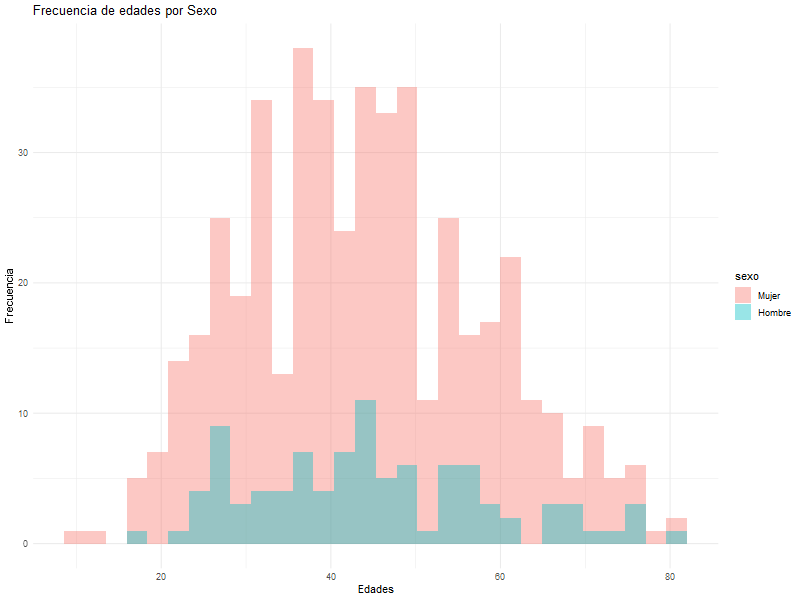

In [ ]:
# Asegura el orden de los factores: Mujer primero, Hombre después
df_agri$sexo <- factor(df_agri$sexo, levels = c("Mujer", "Hombre"))

# Gráfico
ggplot(df_agri, aes(x = edad, fill = sexo)) +
  geom_histogram(alpha = 0.4, position = "identity", bins = 30) +
  xlab("Edades") +
  ylab("Frecuencia") +
  ggtitle("Frecuencia de edades por Sexo")+
    theme_minimal()



### 4.5. Cuantos Personas desearían acceder a un crédito verde 

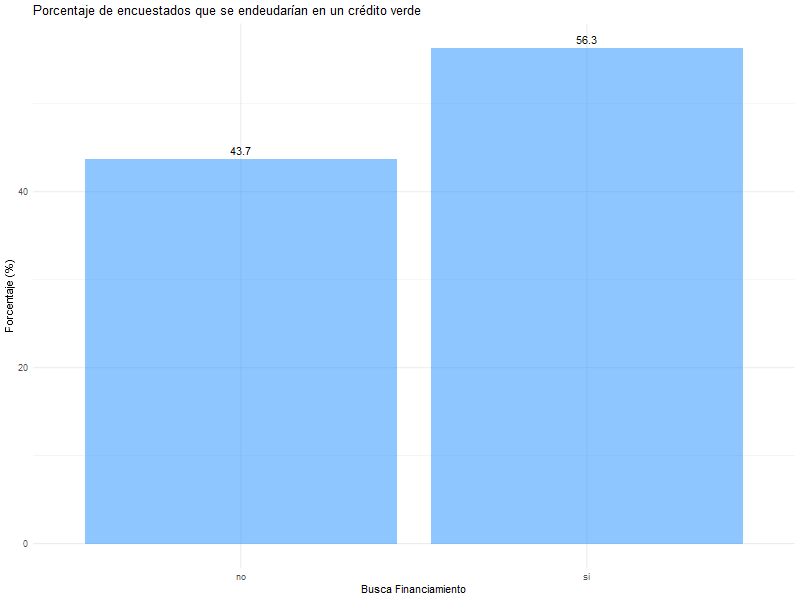

In [ ]:
df_agri %>%
  group_by(financiamiento_deuda) %>%
  summarise(conteo = n()) %>%
  mutate(Porcentaje = (conteo / sum(conteo)) * 100) %>%
  ggplot(aes(x = financiamiento_deuda, y = Porcentaje)) +
  geom_bar(stat = "identity", fill = "#1E90FF", alpha = 0.5) +
  geom_text(aes(label = round(Porcentaje, 1)), vjust = -0.5, size = 4) +
  xlab("Busca Financiamiento") +
  ylab("Porcentaje (%)") +
  ggtitle("Porcentaje de encuestados que se endeudarían en un crédito verde") +
  theme_minimal()




### 4.6. Plot de correlación de variables categóricas

In [ ]:
cor(scale(variables_continuas))

                                ingreso_mensual bono_cuanto diastrabajo_sistemaagroforestal horatrabajo_sistemaagroforestal gasto_sistemaagroforestal        edad
ingreso_mensual                      1.00000000 -0.23016846                     -0.07646897                      0.14857781                0.08869947  0.04086863
bono_cuanto                         -0.23016846  1.00000000                      0.07593215                     -0.10256546               -0.05004502  0.18188223
diastrabajo_sistemaagroforestal     -0.07646897  0.07593215                      1.00000000                     -0.13614469                0.51004700  0.17132507
horatrabajo_sistemaagroforestal      0.14857781 -0.10256546                     -0.13614469                      1.00000000                0.23402924 -0.07293790
gasto_sistemaagroforestal            0.08869947 -0.05004502                      0.51004700                      0.23402924                1.00000000  0.09152977
edad                        

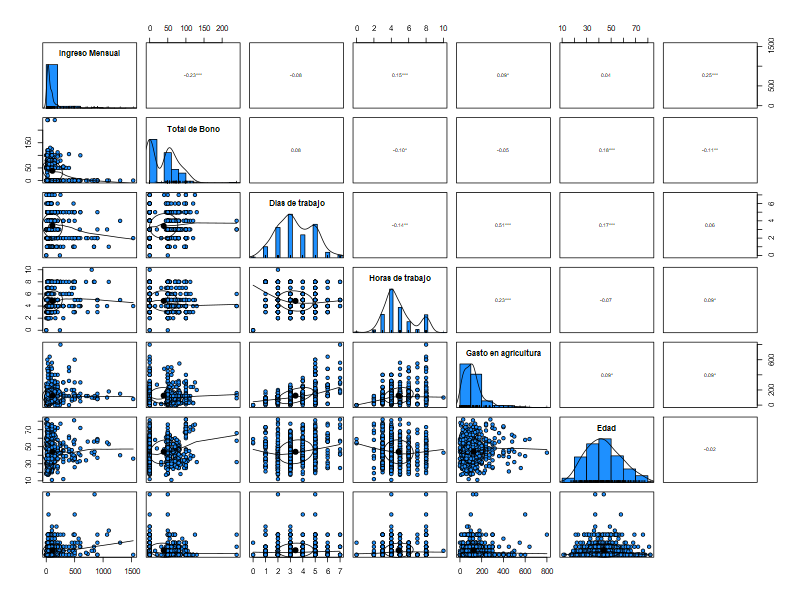

In [ ]:
variables_continuas <- df_agri %>% select(-sexo, -financiamiento_deuda)

# Graficar con control visual
pairs.panels(
  variables_continuas,     # tu dataframe
  labels = c("Ingreso Mensual", "Total de Bono", "Dias de trabajo", "Horas de trabajo", "Gasto en agricultura", "Edad", "Horas mensual"),
  method = "pearson",   # método de correlación
  smooth = TRUE,        # curva loess
  lm = FALSE,           # sin línea lineal
  density = TRUE,       # incluye densidad/histograma
  ellipses = TRUE,      # elipses de correlación
  pch = 21,             # tipo de punto
  col = "black",  # borde de punto
  bg = "#1E90FF",   # relleno de punto
  digits = 2,           # decimales
  cor = TRUE,           # mostrar correlación
  scale = FALSE,        # no escalar texto por tamaño
  rug = TRUE,           # mini barras bajo histograma
  hist.col = "#1E90FF",
  show.points = TRUE,
  breaks = 10,
  smoother = FALSE,
  stars = TRUE,         # mostrar significancia (*, **, ***)
  ci = FALSE,           # sin intervalos de confianza
  cex.labels = 1,     # texto de nombres de variables
  font.labels = 2,      # texto en negrita
  cex.cor = 1.5         # tamaño de números de correlación
)

### 4.7. PCA - Cluster 

Se hace un PCA para entender como se relacionan las diferentes variables con la intencion de acceder o no a un crédito verde

In [ ]:
colnames(df_agri)

[1] "sexo"                            "ingreso_mensual"                 "bono_cuanto"                     "diastrabajo_sistemaagroforestal"
[5] "horatrabajo_sistemaagroforestal" "gasto_sistemaagroforestal"       "financiamiento_deuda"            "edad"                           
[9] "fin_monto"                      

In [ ]:
## Cambiamos las variables de Sexo por una variable binaria
data_pca = df_agri %>%
  ## Cambiar categorías de Sexo
  mutate(sexo  = case_when( 
    sexo  == "Mujer" ~ "0",
    sexo  == "Hombre" ~ "1",
    TRUE ~ sexo   
  )) %>%
  mutate(sexo  = as.numeric(sexo ))%>%
  select(-financiamiento_deuda, -fin_monto) # eliminamos la variable de Financiamiendo_deuda porque esta serán los clsuters
data_pca

    sexo ingreso_mensual bono_cuanto diastrabajo_sistemaagroforestal horatrabajo_sistemaagroforestal gasto_sistemaagroforestal edad
1      1             200           0                               5                               4                       400   45
3      0              10           0                               2                               4                        80   22
4      0             200          74                               2                               8                       120   47
5      0             250          79                               2                               8                        50   42
6      0             100          50                               5                               4                       160   42
7      1              70           0                               4                               8                       240   54
8      0              60          50                               4        

Escalamos los datos, ya que es necesario para hacer el PCA

In [ ]:
pca_normalized <- scale(data_pca)
head(pca_normalized)

        sexo ingreso_mensual bono_cuanto diastrabajo_sistemaagroforestal horatrabajo_sistemaagroforestal gasto_sistemaagroforestal        edad
1  2.2200986      0.52152824  -0.9904824                       1.1125429                      -0.5007507                2.57767179  0.06906994
3 -0.4496402     -0.55943688  -0.9904824                      -0.9919353                      -0.5007507               -0.42524917 -1.56837471
4 -0.4496402      0.52152824   0.9040645                      -0.9919353                       1.8827809               -0.04988405  0.21145643
5 -0.4496402      0.80599275   1.0320744                      -0.9919353                       1.8827809               -0.70677301 -0.14450980
6 -0.4496402     -0.04740077   0.2896169                       1.1125429                      -0.5007507                0.32548107 -0.14450980
7  2.2200986     -0.21807947  -0.9904824                       0.4110501                       1.8827809                1.07621131  0.70980915

Calculamos el PCA con los datos normalizados

In [ ]:
pca_results <- princomp(pca_normalized)
summary(pca_results)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5     Comp.6     Comp.7
Standard deviation     1.2707759 1.2562642 1.0261316 0.9836306 0.8691750 0.80434195 0.60970643
Proportion of Variance 0.2311013 0.2258533 0.1506852 0.1384614 0.1081133 0.09258614 0.05319932
Cumulative Proportion  0.2311013 0.4569547 0.6076399 0.7461013 0.8542145 0.94680068 1.00000000

In [ ]:
pca_results$loadings[, 1:4]

                                     Comp.1      Comp.2       Comp.3      Comp.4
sexo                             0.47526422  0.08544378  0.414059442  0.15551201
ingreso_mensual                  0.48930023  0.12352661  0.313550159 -0.23217894
bono_cuanto                     -0.48155530 -0.24908855  0.002635492 -0.46102113
diastrabajo_sistemaagroforestal  0.08145094 -0.67278451 -0.013127599  0.33866286
horatrabajo_sistemaagroforestal  0.39729631  0.06139707 -0.512625782 -0.60598816
gasto_sistemaagroforestal        0.36772010 -0.57315537 -0.298815235  0.01153694
edad                            -0.05583019 -0.36121982  0.614805709 -0.47678211

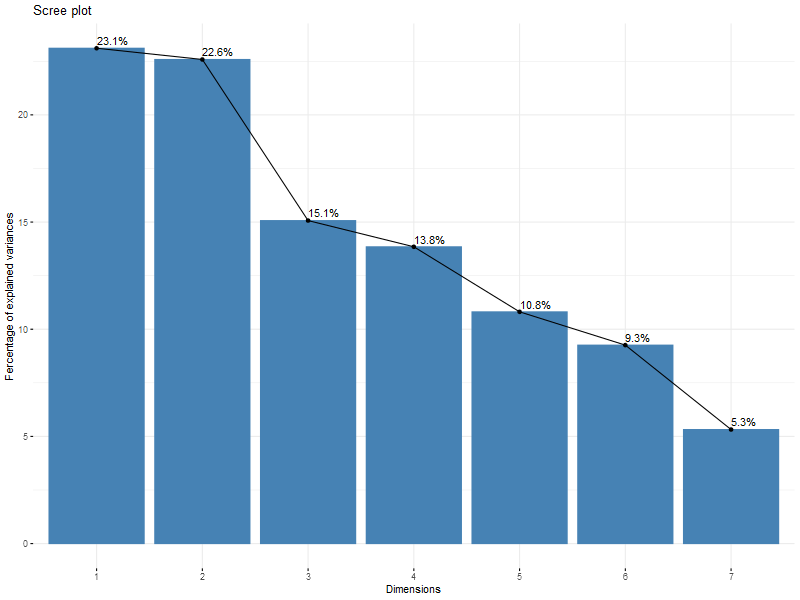

In [ ]:
fviz_eig(pca_results, addlabels = TRUE)

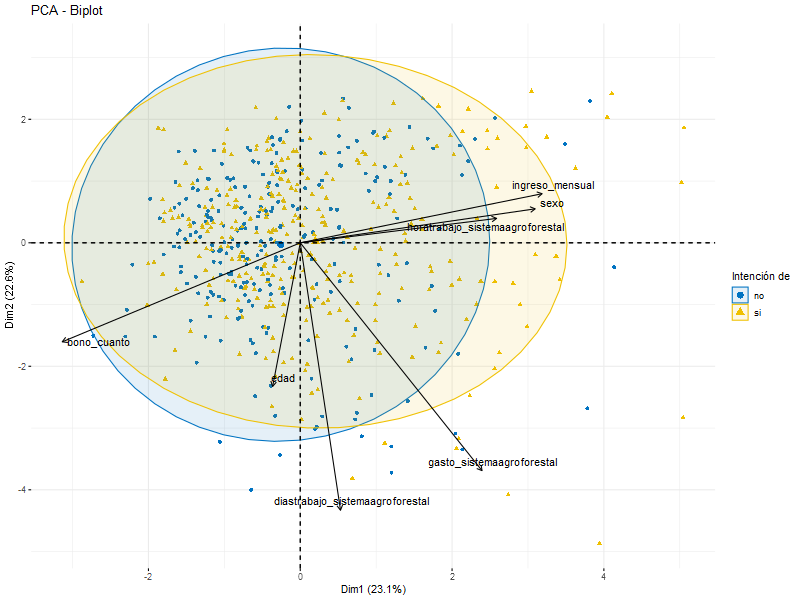

In [ ]:
fviz_pca_biplot(pca_results, 
  col.ind = df_agri$financiamiento_deuda, palette = "jco", 
  addEllipses = TRUE, label = "var",
  col.var = "black", repel = TRUE,
  legend.title = "Intención de") 